# Netflix Dataset Exploratory Data Analysis
#### <span style="color: cornflowerblue">Team 01 | CSPB 4502 | 11/03/22</span>

---

In [2]:
# LIBRARIES USED
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from io import StringIO
import seaborn as sns

In [3]:
# IMPORT NETFLIX MOVIE NAMES
netflix_movie_titles = "../data/netflix/movie_titles.csv"

def manual_sep(old_split):
    new_split = old_split[0:2] + [",".join(old_split[2:])]
    return new_split
    
ntfx = pd.read_csv(netflix_movie_titles,
                   encoding = "ISO-8859-1",
                   header = None,
                   names = ['Movie_Id', 'Year', 'Name'],
                   on_bad_lines=manual_sep,
                   engine='python')
ntfx.dropna(subset='Year', inplace=True)
ntfx['Year'] = ntfx['Year'].astype("Int64")
print("Netflix Movie Names:")
print(f'{ntfx.shape = }')
print(ntfx.head().to_string())
print("Netflix Movie Ratings:")


Netflix Movie Names:
ntfx.shape = (17763, 3)
   Movie_Id  Year                          Name
0         1  2003               Dinosaur Planet
1         2  2004    Isle of Man TT 2004 Review
2         3  1997                     Character
3         4  1994  Paula Abdul's Get Up & Dance
4         5  2004      The Rise and Fall of ECW
Netflix Movie Ratings:


In [4]:
# IMPORT NETFLIX MOVIE RATINGS
netflix_movie_ratings = [f'../data/netflix/combined_data_{i}.txt' for i in range(1, 5)]
stream = StringIO()
movie_number = "1"
for path in netflix_movie_ratings:
    print(f'reading file {path}')
    with open(path, "r") as file:
        patrn = "[0-9]:"
        for line in file:
            if re.search(patrn, line):
                movie_num = line.replace(":\n", "")
            else:
                stream.write(movie_num+","+line)
    file.close()
stream.seek(0)
print("reading done")
ratings = pd.read_csv(stream,
                      encoding = "ISO-8859-1",
                      names = ['Movie_Id', 'CustomerID', 'Rating', 'Date'],
                      engine='c')
stream.close()
del(stream)
ratings.sort_values(by='CustomerID', inplace=True)
ratings.reset_index(inplace=True)
print(f'{ratings.shape = }')
print(ratings.head().to_string())
ratings.to_csv('../data/ratings.csv')

reading file ../data/netflix/combined_data_1.txt
reading file ../data/netflix/combined_data_2.txt
reading file ../data/netflix/combined_data_3.txt
reading file ../data/netflix/combined_data_4.txt
reading done
ratings.shape = (100480507, 5)
      index  Movie_Id  CustomerID  Rating        Date
0  79334307     14358           6       2  2005-12-04
1  34092597      6134           6       4  2005-01-12
2  32652672      5926           6       4  2005-10-26
3  38173947      6797           6       3  2004-11-10
4  20618167      3905           6       3  2005-12-04


In [5]:
# Number of ratings
len(ratings['CustomerID'].unique())

480189

In [6]:
# Number of movies
len(ratings['Movie_Id'].unique())

17770

In [7]:
rating_cnt = ratings.groupby(by=["Movie_Id"])["Rating"].count()
rating_avg = ratings.groupby(by=["Movie_Id"])["Rating"].mean()
rating_std = ratings.groupby(by=["Movie_Id"])["Rating"].std()

In [8]:
# Top 10 most reviewed movies
top_10_count = rating_cnt.sort_values(ascending=False)[:10]
top_10_count.index = [ntfx[ntfx['Movie_Id'] == i]['Name'].values[0] for i in top_10_count.index]
top_10_count

Miss Congeniality                                         232944
Independence Day                                          216596
The Patriot                                               200832
The Day After Tomorrow                                    196397
Pirates of the Caribbean: The Curse of the Black Pearl    193941
Pretty Woman                                              193295
Forrest Gump                                              181508
The Green Mile                                            181426
Con Air                                                   178068
Twister                                                   177556
Name: Rating, dtype: int64

In [9]:
# Top 10 highest reviewed movies
top_10_avg = rating_avg.sort_values(ascending=False)[:10]
top_10_avg.index = [ntfx[ntfx['Movie_Id'] == i]['Name'].values[0] for i in top_10_avg.index]
top_10_avg

Lord of the Rings: The Return of the King: Extended Edition            4.723270
The Lord of the Rings: The Fellowship of the Ring: Extended Edition    4.716611
Lord of the Rings: The Two Towers: Extended Edition                    4.702611
Lost: Season 1                                                         4.670989
Battlestar Galactica: Season 1                                         4.638809
Fullmetal Alchemist                                                    4.605021
Trailer Park Boys: Season 4                                            4.600000
Trailer Park Boys: Season 3                                            4.600000
Tenchi Muyo! Ryo Ohki                                                  4.595506
The Shawshank Redemption: Special Edition                              4.593384
Name: Rating, dtype: float64

In [10]:
top_10_ratings = ratings[ratings['Movie_Id'].isin(rating_cnt.sort_values(ascending=False)[:10].index)]
ids = rating_cnt.sort_values(ascending=False)[:10].index
movie_dict = {i : k for i, k in zip(ids, top_10_count.index)}
top_10_ratings["Movie_Id"] = top_10_ratings["Movie_Id"].apply(lambda x: movie_dict[x])

/tmp/ipykernel_278900/450262342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_ratings["Movie_Id"] = top_10_ratings["Movie_Id"].apply(lambda x: movie_dict[x])


<Figure size 1440x2880 with 0 Axes>

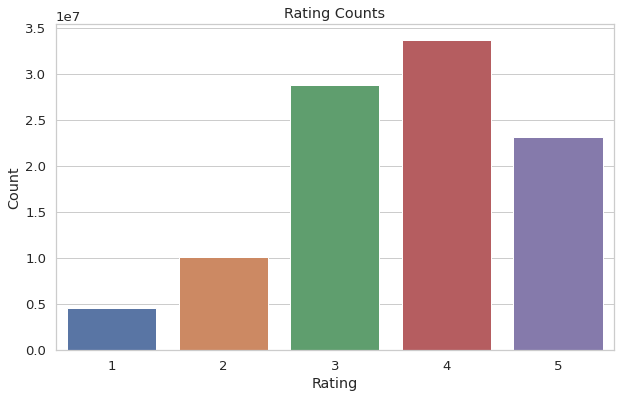

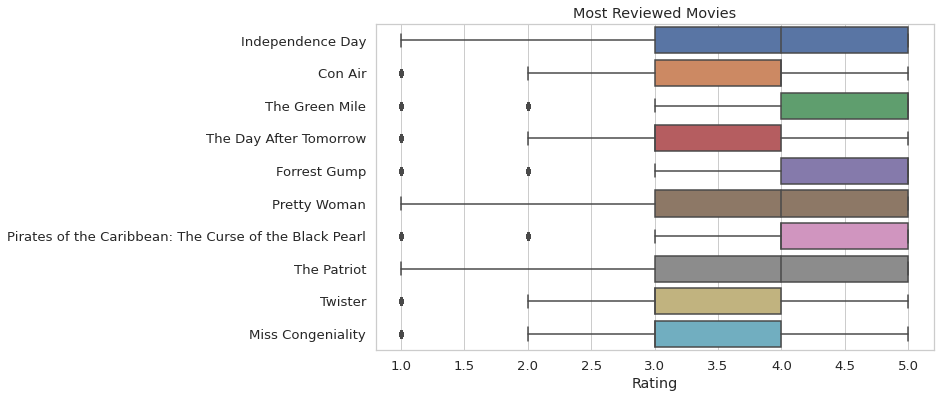

In [15]:
fig = plt.figure(figsize=(20, 40))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
# ax = fig.add_subplot(3, 1, 1)
fig = plt.figure(figsize=(10, 6))
sns.countplot(data=ratings, x="Rating")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Counts')
plt.show()
# ax = fig.add_subplot(3, 1, 2)
fig = plt.figure(figsize=(10, 6))

sns.boxplot(data=top_10_ratings, y="Movie_Id", x="Rating", orient="h")
plt.title("Most Reviewed Movies")
plt.xlabel("Rating")
plt.ylabel("")
plt.show();